# 期末發表 - 用神經網路分辨出圖片裡衣服的顏色

## 步驟:
### 0. 決定我們要辨識哪些顏色的衣服
### 1. 使用網路爬蟲從Google下載大量各種衣服顏色圖片
### 2. 用OpenCV為每張圖片縮放/加邊框 – 整理成可以訓練神經網路的格式
### 3. 將資料集標好X, Y，分成訓練/測試資料
### 4. 建立神經網路的架構
### 5. 將訓練資料餵入神經網路做訓練
### 6. 用測試資料測試神經網路分類的正確率

## 發表前會做的事: 做PPT，新增多一些圖片淺顯易懂

## 0. 決定我們要辨識哪些顏色的衣服

In [ ]:
# 這次我選了一些基本的顏色，總共11種
# 黑色，白色，灰色，紅色，粉紅色，紫色，黃色，藍色，深藍色，綠色，咖啡色

## 1. 使用網路爬蟲從Google下載大量各種衣服顏色圖片

### 網址: https://google-images-download.readthedocs.io/en/latest/

In [ ]:
!pip install google_images_download #安裝套件 (或用終端機下載)

In [ ]:
# 在終端機裡面輸入程式碼
# googleimagesdownload -pk "black , navy blue, ..." -k "t shirt" -l 200 -cd "C:/Users/Max/Downloads/chromedriver.exe"

In [ ]:
# 上面 -pk 為Prefix，此例跟 -k 合用為搜尋 "black t shirt" 及 "blue t shirt" 的圖片。
# -l 為下載張數 (但有些可能沒辦法下載成功)，超過100張時需要安裝chromedriver並在-cd後面打上.exe檔的位置

### 經過適當整理之後的圖片資料集
<img src="T-shirt 1.png">

### 總共11個資料夾 (Pics 為之後圖片前處理結束時圖片存放位置)
<img src="T-shirt 2.png">

## 2. 用OpenCV為每張圖片縮放/加邊框 – 整理成可以訓練神經網路的格式

In [1]:
# 必要套件
import os
import cv2

### 匯入圖片 -> 縮放圖片 -> 用白色填滿比較短的那邊 -> 匯出至一個新的資料夾

In [ ]:
# 資料集中衣服的所有顏色
folder = "E:\Training Pics"
shirt_colors = os.listdir(folder)

#Image number
img_no = 0

# 圖片經前處理之後應產生100x100px的圖片
desired_size = 100

# Root Directory here
for shirt_color in shirt_colors:
    directory = os.path.join(folder, shirt_color)
    os.chdir(directory)  #os.chdir: Change Directory
    images = os.listdir(path = directory)
    
    # 列出每個資料夾裡面的所有圖片之後，一個一個圖片做前處理
    for image in images:
    
        # 匯入圖片
        im = cv2.imread(image)
        
        # 這邊用try/except以免系統遇到例外而中止
        try:
    
            # Get size of image, old_size is in (height, width) format
            old_size = old_height, old_width = im.shape[:2]
            
            #算出縮放比例 (圖片長邊縮至100px)
            ratio = float(desired_size/max(old_size))

            new_height, new_width = int(old_height*ratio), int(old_width*ratio)

            # resize should be in (width, height) format
            img = cv2.resize(im, (new_width, new_height))

            # 使用 cv2.copyMakeBorder 加白色邊框
            left = (desired_size-new_width)//2
            right = desired_size-(new_width+left)
            top = (desired_size-new_height)//2
            bottom = desired_size-(new_height+top)
            color = [255, 255, 255] # white R,G,B

            img2 = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value = color)
        
    
            # 進行圖片輸出，檔名為 "衣服顏色"_"編號".jpg
            img_no += 1
            img_name = str(shirt_color) + "_" + str(img_no) +".jpg" #Modify name each pic
            cv2.imwrite(img_name, img2)
    
            print(f"Created: {img_name} from {image}")
        
        except:
            
            print(f"Error: Cannot convert {image}")
        
    img_no = 0

### 結果展示

<img src = "T-shirt 3.png">

## 3. 將資料集標好X, Y，分成訓練/測試資料

### X: 衣服圖片(100 x 100 像素)
### Y: 衣服顏色 (11種顏色之一)

In [2]:
# 必要套件
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import os
# import cv2
import keras

Using TensorFlow backend.


In [3]:
# 設定好圖片資料夾位置及顏色
DIRECTORY = "E:/Training Pics/Pics"
CATEGORIES = ["Black", "Blue", "Brown", "Gray", "Green", "Navy Blue", "Pink", "Purple", "Red", "White", "Yellow"]

### 在執行下面的程式碼之前，已將11種顏色各130張前處理好的衣服圖片放入資料夾裡

In [15]:
# 這邊產生X，利用cv2.imread將圖片存成(100, 100, 3)的array，變成list，將全部照片合進X後再轉回array
X = []

for image in os.listdir(DIRECTORY):
    img_array = cv2.imread(os.path.join(DIRECTORY, image))
    img_list = img_array.tolist()
    X.append(img_list)
        
X = np.array(X)

In [ ]:
# 這邊產生Y，Y為衣服顏色轉換成數字
"""
"Black" : 0
"Blue" : 1
"Brown" : 2
"Gray" : 3
"Green" : 4
"Navy Blue" : 5
"Pink" : 6
"Purple" : 7
"Red" : 8
"White" : 9
"Yellow" : 10
"""

In [10]:
# 因為在資料夾裡的圖片已經都照上面的顏色順序排好，所以可以安心的造一個0~10重複130次的array，但如果沒有排則不能這麼做
Y = []
for i in range(11):
    Y.append([i]*130)
    
Y = np.array(Y)
Y = Y.reshape(1430, ) #Reshape成接下來可供訓練的格式

In [16]:
#確認一下形狀
X.shape

(1430, 100, 100, 3)

In [17]:
Y.shape

(1430,)

### 分成訓練/測試資料

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)

In [20]:
#確認一下形狀
X_train.shape

(1144, 100, 100, 3)

In [21]:
Y_train.shape

(1144,)

In [22]:
# 原本Array裡面的元素都是0~255，訓練神經網路時裡面的元素需要是0~1，所以整個矩陣除以255
X_train = X_train/255
X_test = X_test/255

In [23]:
from keras.utils import to_categorical

In [24]:
# One-hot encoding
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

### 4. 建立神經網路的架構

In [25]:
#必要套件
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Activation, Flatten
from keras.optimizers import Adam, SGD

In [26]:
model = Sequential()

In [27]:
# 加入第一層時需要設定input形狀，這邊是(100, 100, 3)
model.add(Conv2D(8, (3, 3), padding = 'same', input_shape = (100, 100, 3), activation = 'relu'))

In [28]:
model.add(Conv2D(8, (3, 3), padding = 'same', activation = 'relu'))

In [29]:
model.add(MaxPool2D(pool_size = (2, 2)))

In [30]:
model.add(Conv2D(16, (3, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(16, (3, 3), padding = 'same', activation = 'relu'))

In [31]:
model.add(MaxPool2D(pool_size = (2, 2)))

In [32]:
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))

In [33]:
model.add(MaxPool2D(pool_size = (2, 2)))

In [34]:
model.add(Flatten())

In [35]:
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(11, activation = 'softmax'))

In [36]:
model.compile(loss = "logcosh", optimizer=Adam(lr = 0.001), metrics = ['accuracy'])

In [37]:
# 查看模型架構
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 8)       224       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 8)       584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 16)        1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 32)        4640      
__________

### 5. 將訓練資料餵入神經網路做訓練

In [38]:
# 餵入 X_train, Y_train
model.fit(X_train, Y_train, batch_size = 20, epochs = 20)


Epoch 1/20
1144/1144 [==============================] - 15s 13ms/step - loss: 0.0358 - acc: 0.1425
Epoch 2/20
1144/1144 [==============================] - 3s 2ms/step - loss: 0.0337 - acc: 0.2640
Epoch 3/20
1144/1144 [==============================] - 3s 3ms/step - loss: 0.0327 - acc: 0.3173
Epoch 4/20
1144/1144 [==============================] - 3s 2ms/step - loss: 0.0306 - acc: 0.3907
Epoch 5/20
1144/1144 [==============================] - 3s 3ms/step - loss: 0.0284 - acc: 0.4607
Epoch 6/20
1144/1144 [==============================] - 3s 3ms/step - loss: 0.0266 - acc: 0.4921
Epoch 7/20
1144/1144 [==============================] - 3s 2ms/step - loss: 0.0228 - acc: 0.5883
Epoch 8/20
1144/1144 [==============================] - 3s 2ms/step - loss: 0.0223 - acc: 0.6110
Epoch 9/20
1144/1144 [==============================] - 3s 3ms/step - loss: 0.0209 - acc: 0.6425
Epoch 10/20
1144/1144 [==============================] - 3s 3ms/step - loss: 0.0186 - acc: 0.6932
Epoch 11/20
1144/1144 [===

### 6. 用測試資料測試神經網路分類的正確率

In [39]:
# 使用訓練好的神經網路幫測試資料分類
Y_predict = model.predict_classes(X_test)

In [40]:
# 查看測試資料分類正確率
score = model.evaluate(X_test, Y_test)
print(f"Accuracy: {score[1]}")

286/286 [==============================] - 0s 1ms/step
Accuracy: 0.7412587391746628


### 7. 展示成果

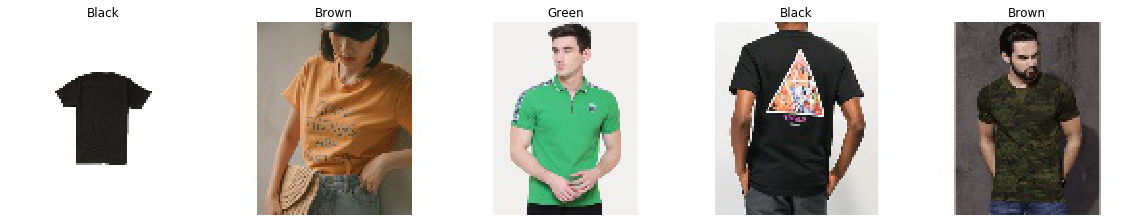

In [66]:
num = np.random.randint(1, 286, 5)
plt.figure(figsize=(20, 20))
for i in range(5):
    plt.subplot(1,5,i+1)
    X_pixels = X_test[num[i]].reshape(100, 100, 3)[:,:,::-1]
    plt.imshow(X_pixels)
    plt.title(CATEGORIES[Y_predict[num[i]]])
    plt.axis("off")